# Laboratorna robota 2

In [3]:

import matplotlib.pyplot as plt
import time
import os


# LZW Algorithm

In [4]:

'''Module with classes to compress information in different ways.'''

import csv

class Lzw_compress:
    '''Use LZW algorithm to encode and decode information.'''
    def encode(text: str) -> tuple[list[int], dict]:
        '''
        Encode text.
        Return a tuple with list of coded information and default dictionary to decode.
        '''
        chrs_dict = {idx: chr for idx, chr in enumerate(sorted(list(set(text))))}
        chrs_default = {key: chr for key, chr in chrs_dict.items()}
        code = []

        i = 0
        while i < len(text): # go through the text
            current_chr = text[i]
            if i == len(text) - 1:
                code.append(list(chrs_dict.keys())[list(chrs_dict.values()).index(current_chr)]) # get the code
                break
            end = False
            while current_chr in chrs_dict.values():
                i += 1
                if i == len(text):
                    code.append(list(chrs_dict.keys())[list(chrs_dict.values()).index(current_chr)]) # get the code
                    end = True
                    break
                current_chr = current_chr + text[i]
            if end:
                break
            current_chr = current_chr[0:-1] if len(current_chr) > 1 else current_chr
            code.append(list(chrs_dict.keys())[list(chrs_dict.values()).index(current_chr)]) # get the code
            next_chr = text[i]
            chrs_dict[len(chrs_dict)] = current_chr + next_chr
        
        return code, chrs_default

    def decode(code: list[int], default_dict: dict) -> str:
        '''
        Decode information encoded with LZW algorithm.
        
        Return text.
        '''
        text = []
        i = 0
        while i < len(code):
            if i < len(code) - 1 and code[i+1] in default_dict:
                default_dict[len(default_dict)] = default_dict[code[i]] + default_dict[code[i+1]][:1]
            else:
                default_dict[len(default_dict)] = default_dict[code[i]] + default_dict[code[i]][:1]
            text.append(default_dict[code[i]])
            i += 1
        
        return ''.join(text)

    def write_encoded(code: list[int], def_dict: dict[int], file_name: str) -> None:
        '''Write encoded text to a file.'''
        with open(file_name, 'w') as file:
            file.write(','.join([str(num) for num in code]))
            file.write(str(def_dict))


### Testing

In [5]:
math_text = '11213409172489889898121341345134511617171167'
weird_text = 'abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd'
short_text = 'I love discrete math without any discussions.'
big_text = 'Доброго дня, пані Світлано!\nЯ – … студентка Українського католицького \
університету. Представниця організаторів інтелектуальної гри «Monty Quiz». Звертаюся \
до компанії «Sigma Software» з пропозицією стати партнерами нашого заходу.\nПишу вам, \
бо наша команда цінує значний вклад «Sigma Software» в розвиток ІТ-освіти, надійність і \
високу якість наданих послуг.\n«Monty Quiz» – тематичний квіз для любителів Python. \
Ділимося з вами нашим першим досвідом проведення гри серед студентів та викладачів \
УКУ й додаємо правила, фотозвіт та посилання на пост.\
до компанії «Sigma Software» з пропозицією стати партнерами нашого заходу.\nПишу вам, \
бо наша команда цінує значний вклад «Sigma Software» в розвиток ІТ-освіти, надійність і \
високу якість наданих послуг.\n«Monty Quiz» – тематичний квіз для любителів Python. \
Ділимося з вами нашим першим досвідом проведення гри серед студентів та викладачів \
УКУ й додаємо правила, фотозвіт та посилання на пост.\
до компанії «Sigma Software» з пропозицією стати партнерами нашого заходу.\nПишу вам, \
бо наша команда цінує значний вклад «Sigma Software» в розвиток ІТ-освіти, надійність і \
високу якість наданих послуг.\n«Monty Quiz» – тематичний квіз для любителів Python. \
Ділимося з вами нашим першим досвідом проведення гри серед студентів та викладачів \
УКУ й додаємо правила, фотозвіт та посилання на пост.'

text_list = [math_text, weird_text, short_text, big_text]
for text in text_list:
    code, def_dic = Lzw_compress.encode(text)
    assert(text == Lzw_compress.decode(code, def_dic))


## Conclusion

Файл з одноманітним наповненням стиснув у 1,8 раз, файл з різноманітним у 0,68. Тобто алгоритм LZW треба використовувати або на дуже великих файлах, бо тоді буде багато повторень, або на файлах з одноманітним наповненням.

# LZ77 Algorithm


In [6]:
class Lz77_compress:
    '''Use LZ-77 algorithm to encode and decode information.'''
    def encode(text: str, buffer_size: int) -> list[tuple[int, int, str]]:
        '''
        Encode text.
        Return a list with tuples of coded information.
        '''
        code = []
        buffer = ['']
        i = 0 # idx of current letter
        while i < len(text):
            for idx, chr in enumerate(buffer):
                if idx == len(buffer) - 1:
                    code.append((0, 0, text[i]))
                    i += 1
                    buffer = text[max(0, i - buffer_size): i]
                    break

                if chr == text[i]:
                    start = idx
                    num_chr = 1
                    if i == len(text) - 1:
                        code.append((len(buffer) - start, num_chr, ''))
                        return code
                    while idx + 1 < len(buffer) and buffer[idx + 1] == text[i + 1]:
                        num_chr += 1
                        i += 1
                        idx += 1
                    code.append((len(buffer) - start, num_chr, text[i + 1]))
                    i += 1
                    buffer = text[max(0, i - buffer_size + 1) : i + 1]
                    i += 1
                    break

        return code

    def decode(code: list[tuple[int, int, str]]) -> str:
        '''
        Decode information encoded with LZ-77 algorithm.
        
        Return text.
        '''
        decode = ''
        for back, number, last in code:
            decode = decode + decode[len(decode) - back : len(decode) - back + number] + last
        
        return decode

### Testing

In [7]:
math_text = '11213409172489889898121341345134511617171167'
weird_text = 'abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd'
short_text = 'I love discrete math without any discussions.'
text_list = [math_text, weird_text, short_text, big_text]

for text in text_list:        
    code, def_dic = Lzw_compress.encode(text)
    assert(text == Lz77_compress.decode(Lz77_compress.encode(text, 4)))
    assert(text == Lz77_compress.decode(Lz77_compress.encode(text, 5)))
    assert(text == Lz77_compress.decode(Lz77_compress.encode(text, 6)))
    assert(text == Lz77_compress.decode(Lz77_compress.encode(text, 7)))
    assert(text == Lz77_compress.decode(Lz77_compress.encode(text, 8)))
    assert(text == Lz77_compress.decode(Lz77_compress.encode(text, 9)))

## Conclusion

Одноманітний текст з буфером 7 зменшив у 0,18. 
Одноманітний текст з буфером 17 зменшив у  1,2. 
Одноманітний текст з буфером 27 зменшив у 0,33.
Для ефективного використання LZ-77 треба правильно підібрати розмір буферу. Це дуже впливає на результат. Обирати розмір треба відповідно до відстані між повторами у тексті. Треба, щоб коли ми зустрічаємо паттерн у тексті, то у буфері був попередній. Тоді результат буде оптимальним.


Різноманітний текст з буфером 7 зменшив у  0,12. 
Різноманітний текст з буфером 17 зменшив у 0,13. 
Різноманітний текст з буфером 27 зменшив у 0,14.
На різноманітному тексті розмір буфера не допоможе. Алгоритм найкраще працює на тексті, де паттерни розташовані близько. Тоді і швидкість більша, бо можна взяти буфер меншого роміру.

# Huffman Algorithm


In [8]:
from collections import Counter, defaultdict

class Huffman:
    """
    Reduce size file.
    """
    def count_frequency(self, message: str) -> list[tuple]:
        """
        Count frequency for all unique elements in message

        Args:
            Message: 'random string'

        Returns:
            List with probability

        """
        return [(key, freq/len(message)) for key, freq in Counter(message).items()]

    def build_code(self, probability: list[tuple]) -> dict:
        """
        Build tree and create dictionary with code for all letters

        Args:
            Probability: [("A", 0.1), ("B", 0.1), ("C", 0.1), ("E", 0.7)])

        Returns:
            Dictionary of code: {'A': '101', 'B': '001', 'C': '11', 'E': '0'}
        """
        dict_code = defaultdict(str)
        sort_probability = sorted(probability, key=lambda x: x[1])
        while len(sort_probability) != 1:
            left_node, right_node = sort_probability[0], sort_probability[1]
            parent_node = (left_node[0] + right_node[0], left_node[1] + right_node[1])

            for name in left_node[0]:
                dict_code[name] += '1' 
            for name in right_node[0]:
                dict_code[name] += '0'

            sort_probability.append(parent_node)
            sort_probability.pop(0)
            sort_probability.pop(0)

        return dict_code

    def encode(self, message: str) -> list[float]:
        """
        Encode by Huffman algorithm

        Args:
            Message: 'random string'

        Returns:
            list: encoded message
        """
        probability = self.count_frequency(message)
        dict_code = self.build_code(probability)
        code_message = []
        for letter in message:
            code_message.append(dict_code.get(letter))
        return code_message, dict_code
    
    def decode(self, code: list[float], tree: dict) -> str:
        """
        Decode message by Huffman algorithm
        
        Args:
            Code: encoded message
            Tree: dictionary, key - number or letter and value - binary code 

        Returns:
            str: decoded message
        """
        decode_code = []
        for item in code:
            for key, value in tree.items():
                if item == value:
                    decode_code.append(key)
        return ''.join(decode_code)

 

### Testing

In [9]:
math_text = '11213409172489889898121341345134511617171167'
weird_text = 'abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd\
abacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacdabacabadabacacacd'
short_text = 'I love discrete math without any discussions.'
big_text = 'Доброго дня, пані Світлано!\nЯ – … студентка Українського католицького \
університету. Представниця організаторів інтелектуальної гри «Monty Quiz». Звертаюся \
до компанії «Sigma Software» з пропозицією стати партнерами нашого заходу.\nПишу вам, \
бо наша команда цінує значний вклад «Sigma Software» в розвиток ІТ-освіти, надійність і \
високу якість наданих послуг.\n«Monty Quiz» – тематичний квіз для любителів Python. \
Ділимося з вами нашим першим досвідом проведення гри серед студентів та викладачів \
УКУ й додаємо правила, фотозвіт та посилання на пост.\
до компанії «Sigma Software» з пропозицією стати партнерами нашого заходу.\nПишу вам, \
бо наша команда цінує значний вклад «Sigma Software» в розвиток ІТ-освіти, надійність і \
високу якість наданих послуг.\n«Monty Quiz» – тематичний квіз для любителів Python. \
Ділимося з вами нашим першим досвідом проведення гри серед студентів та викладачів \
УКУ й додаємо правила, фотозвіт та посилання на пост.\
до компанії «Sigma Software» з пропозицією стати партнерами нашого заходу.\nПишу вам, \
бо наша команда цінує значний вклад «Sigma Software» в розвиток ІТ-освіти, надійність і \
високу якість наданих послуг.\n«Monty Quiz» – тематичний квіз для любителів Python. \
Ділимося з вами нашим першим досвідом проведення гри серед студентів та викладачів \
УКУ й додаємо правила, фотозвіт та посилання на пост.'

text_list = [math_text, weird_text, short_text, big_text]

for text in text_list:
    huffman = Huffman()
    code, tree = huffman.encode(text)
    decoded = huffman.decode(code, tree)
    assert (text == huffman.decode(code, tree))
    

## Conclusion

Одним з переваг алгоритму Хаффмана є те, що він може здійснювати стиснення даних без втрати якості. Крім того, цей алгоритм добре працює на текстових даних з часто повторюваними символами, хоч алгоритм може бути повільнішим за решту алгоритмів.

### Comparing Algorithms

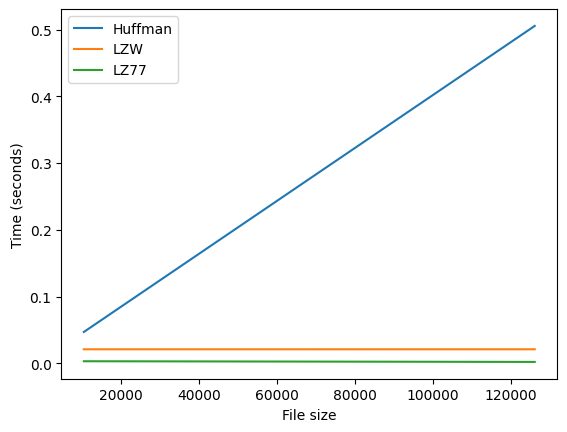

In [12]:
pathes_to_file = ['different_text.txt', 'monotonous.txt'] 

file_size = list(map(os.path.getsize, pathes_to_file))

def read_file(input_file):
    """Read file """
    with open(input_file, 'r', encoding='utf-8') as file:
        return file.read()

time_Huffman = []
time_LZW = []
time_LZ77 = []
for file in pathes_to_file:
    data = read_file(file)

    # take time from Haffman Algorithm
    start_time = time.time()
    huffman = Huffman()
    code, tree = huffman.encode(data)
    decoded = huffman.decode(code, tree)
    final_time = time.time() - start_time
    time_Huffman.append(final_time)

    # take time from LZW Algorithm
    start_time = time.time()
    code, def_dic = Lzw_compress.encode(text)
    Lzw_compress.decode(code, def_dic)
    final_time = time.time() - start_time
    time_LZW.append(final_time)  

#     # take time from LZ77 Algorithm
    start_time = time.time()
    Lz77_compress.decode(Lz77_compress.encode(text, 4))
    final_time = time.time() - start_time
    time_LZ77.append(final_time)  

# print(time_LZ77)


plt.plot(file_size, time_Huffman, label="Huffman")  
plt.plot(file_size, time_LZW, label="LZW")  
plt.plot(file_size, time_LZ77, label="LZ77")  
plt.legend()  
plt.xlabel("File size")  
plt.ylabel("Time (seconds)")  
plt.show()



